## Molecule Search

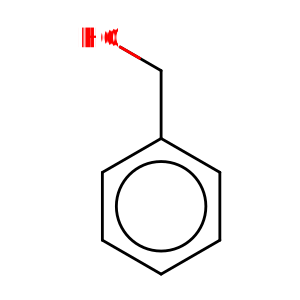

In [1]:
from chemaxon import import_mol, MoleculeSearch, SearchType, Standardizer

query = import_mol('C1=CC=CC=C1')
target = import_mol('OCc1ccccc1')
target

Hit indexes

In [2]:
substructure_search = MoleculeSearch()
hit = substructure_search.find_hit(query, target)
hit.hit_indexes

[2, 3, 4, 5, 6, 7]

Duplicate search, setting search options

In [3]:
duplicate_search = MoleculeSearch(search_type=SearchType.DUPLICATE)
hit = duplicate_search.find_hit(query, target)
hit is None

True

Hit coloring

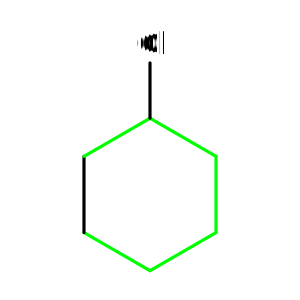

In [11]:
q = import_mol('CCCCCC')
t = import_mol('C1CCCCC1Cl')
MoleculeSearch().find_hit(q, t, return_colored_hit=True).colored_mol

Setting standardizer

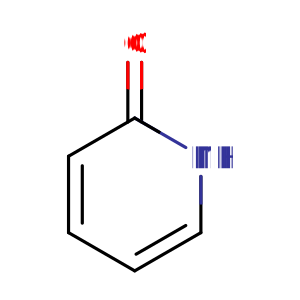

In [5]:
basic_arom_search = MoleculeSearch(standardizer=Standardizer('aromatize:b'))
q_basic = import_mol('CC')
t_basic = import_mol('O=C1NC=CC=C1')
t_basic

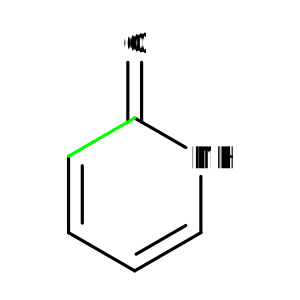

In [6]:
basic_arom_search.find_hit(q_basic,t_basic, return_colored_hit=True).colored_mol

No standardizer

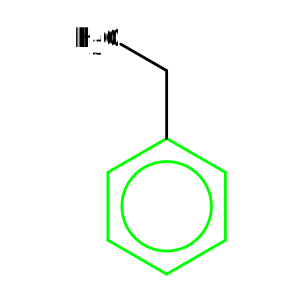

In [7]:
search_no_st = MoleculeSearch(standardizer="")
search_no_st.find_hit(import_mol('c1ccccc1'), import_mol('c1ccccc1CC'), True).colored_mol

In [8]:
search_no_st = MoleculeSearch(standardizer=None)
search_no_st.find_hit(import_mol('c1ccccc1'), import_mol('C1=CC=CC=C1'), True) is None

True